31 May, 2018
<center><h1>Assessed Exercise - Advanced Statistical Inference</h1>
<h4>Student Name: MAHESH Krithika</h4></center>


### Importing Libraries

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import multivariate_normal as mv_norm
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix 
import seaborn as sn

<div class='alert alert-info'>
**Question 1:** (code) Download the Fashion MNIST and CIFAR10 datasets and import them. [3]
</div>

### Importing `Fashion MNIST` dataset

In [123]:
# Set base path
#base_path = '/mnt/workspace/challenge_data/'

# Specify train and test file names 
ftrain_csv = "fashion-mnist_train.csv"
ftest_csv = "fashion-mnist_test.csv"

# Import train and test data into dataframes ftrain_df anf ftest_df respectively 
ftrain_df = pd.read_csv(ftrain_csv)
ftest_df = pd.read_csv(ftest_csv)

#Printing a sample of the train and test data
print('Sample train records:\n')
print(ftrain_df.head())
print('Sample test records:\n')
print(ftest_df.head())

Sample train records:

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9    ...     pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0        30        43   
3       0    ...            3         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  pixel784  
0         0         0      

In [124]:
# Displaying number of records in train and test datasets 
print('Number of train records (MNIST) = ', len(ftrain_df))
print('Number of test records (MNIST) = ', len(ftest_df))

Number of train records (MNIST) =  60000
Number of test records (MNIST) =  10000


<div class='alert alert-warning'>
The Fashion MNIST dataset contains 60000 train records and 10000 test records.<br>
Each record in the data is a picture classified with a specific label which in turn depends on the 784 pixel values. 
</div>

### Importing `CIFAR10` dataset

In [125]:
# Importing CIFAR10 train and test data into dictionaries by batches
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
cftrain1 = unpickle('data_batch_1') #Holds the first train batch of 10000 records
cftrain2 = unpickle('data_batch_2')
cftrain3 = unpickle('data_batch_3')
cftrain4 = unpickle('data_batch_4')
cftrain5 = unpickle('data_batch_5')
cftest = unpickle('test_batch')

In [126]:
# Understanding data in the cftrain dictionaries 

def check_data(cftrain):    
    print(cftrain.keys())
    print(cftrain[b'batch_label'])
    print('Number of records= ', len(cftrain1[b'labels']))
    print('Samples x Features =', np.shape(cftrain[b'data']))
    print('Number of filenames=', len(cftrain[b'filenames']))
    #print(cftrain[b'filenames'])
    
print('CFTRAIN 1')
check_data(cftrain1)
#print(len(cftrain1[b'data']))

print('\nCFTRAIN 2')
check_data(cftrain2)

print('\nCFTRAIN 3')
check_data(cftrain3)

print('\nCFTRAIN 4')
check_data(cftrain4)

print('\nCFTRAIN 5')
check_data(cftrain5)

print('\nCFTEST')
check_data(cftest)

CFTRAIN 1
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
b'training batch 1 of 5'
Number of records=  10000
Samples x Features = (10000, 3072)
Number of filenames= 10000

CFTRAIN 2
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
b'training batch 2 of 5'
Number of records=  10000
Samples x Features = (10000, 3072)
Number of filenames= 10000

CFTRAIN 3
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
b'training batch 3 of 5'
Number of records=  10000
Samples x Features = (10000, 3072)
Number of filenames= 10000

CFTRAIN 4
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
b'training batch 4 of 5'
Number of records=  10000
Samples x Features = (10000, 3072)
Number of filenames= 10000

CFTRAIN 5
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
b'training batch 5 of 5'
Number of records=  10000
Samples x Features = (10000, 3072)
Number of filenames= 10000

CFTEST
dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
b

In [127]:
# Converting dictionaries to dataframes for easier analysis with pandas

def getDF(cfdict):
    d = {'labels': cfdict[b'labels'], 'filenames': cfdict[b'filenames'], 'data': list(cfdict[b'data'])}
    cf_df = pd.DataFrame(data = d)
    return cf_df

cftrain1_df = getDF(cftrain1)
cftrain2_df = getDF(cftrain2)
cftrain3_df = getDF(cftrain3)
cftrain4_df = getDF(cftrain4)
cftrain5_df = getDF(cftrain5)
cftest_df = getDF(cftest)

In [128]:
# Concatenate the cftrain*_df dataframes onto one cftrain_df dataframe:

frames = [cftrain1_df, cftrain2_df, cftrain3_df, cftrain4_df, cftrain5_df]
cftrain_df = pd.concat(frames)
print('Number of train records (CIFAR) = ', len(cftrain_df))
print('Number of train records (CIFAR) = ', len(cftest_df))
cftrain_df.head()

Number of train records (CIFAR) =  50000
Number of train records (CIFAR) =  10000


,data,filenames,labels
0,"[59, 43, 50, 68, 98, 119, 139, 145, 149, 149, ...",b'leptodactylus_pentadactylus_s_000004.png',6
1,"[154, 126, 105, 102, 125, 155, 172, 180, 142, ...",b'camion_s_000148.png',9
2,"[255, 253, 253, 253, 253, 253, 253, 253, 253, ...",b'tipper_truck_s_001250.png',9
3,"[28, 37, 38, 42, 44, 40, 40, 24, 32, 43, 30, 3...",b'american_elk_s_001521.png',4
4,"[170, 168, 177, 183, 181, 177, 181, 184, 189, ...",b'station_wagon_s_000293.png',1


<div class='alert alert-warning'>
The CIFAR10 dataset contains 50000 train records and 10000 test records.<br>
Each record in the data is a picture classified with a specific label which in turn depends on the 3072 features. 
</div>

<div class='alert alert-warning'>
Further processing can now be done using the below data structures:<br><br>

**Fashion MNIST**<br>
Training Data: `ftrain_df`<br>
Test Data: `ftest_df`<br><br>

**CIFAR10**<br>
Training Data: `cftrain_df`<br>
Test Data: `cftest_df`

</div>

<div class='alert alert-info'>
**Question 2:** (text) Comment on the distribution of class labels and the dimensionality of the input and how these may
affect the analysis. [7]
</div>

<div class='alert alert-warning'>

**Dimensionality of input**<br>
The *Fashion MNIST* dataset contains 60000 training records and 10000 test records. <br>
Each sample picture in the dataset is defined by 784 (8 bit pixel information) feature columns each representing 28x28 grayscale image associated with a label from 10 classes.<br>
The value of label specifies the classifictaion of the sample picture.<br>
Label (target variable) is a function of the 784 feature variables.<br><br>

The *CIFAR10* dataset contains 5 batches of training data records, each with 10000 records representing 10000 training images.<br>
These five batches have been concatenated into a single dataframe `cftrain_df` to contain 50000 training records (representing 50000 training images).The test dataset contains 10000 records (representing 10000 test images).<br> 
Similar to the Fashion MNIST, the label (target variable) in CIFAR10 represents the classification of the sample training picture.<br>
The feature variables for determining the label are present as an array with 3072 feature values for each image. The array of features consists of 32x32 color image with respect to each color channel: first 1024 contain red channel values, next 1024 contain green channel values and the last 1024 contain blue channel values (making a total of 3072 features).<br>
The column 'Labels' represents the classification of these images as belonging to one of the ten classes (0-9) of images.<br><br>

**Distribution of class labels**<br>
The *Fashion MNIST* dataset contains 10 class labels and the labels are uniformly distributed across the training samples such that 6000 training samples belong to each class label.
<br>
Similar to the Fashion MNIST, the *CIFAR10* dataset also contains 10 labels that are uniformly distributed across the training samples such that 5000 samples belongs to each class label.<br>
The same is true in case of test datasets as well for MNIST and CIFAR.<br>
This distribution is visualized below:
</div>

In [129]:
# Checking label distribution in Fasion MNIST
label_dist_fashion = ftrain_df['label'].groupby(ftrain_df.label).count()
print('label distribution in Fasion MNIST:')
print(label_dist_fashion)

# Checking label distribution in CIFAR10
label_dist_cifar = cftrain_df['labels'].groupby(cftrain_df['labels']).count()
print('\nlabel distribution in CIFAR10:')
print(label_dist_cifar)

label distribution in Fasion MNIST:
label
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: label, dtype: int64

label distribution in CIFAR10:
labels
0    5000
1    5000
2    5000
3    5000
4    5000
5    5000
6    5000
7    5000
8    5000
9    5000
Name: labels, dtype: int64


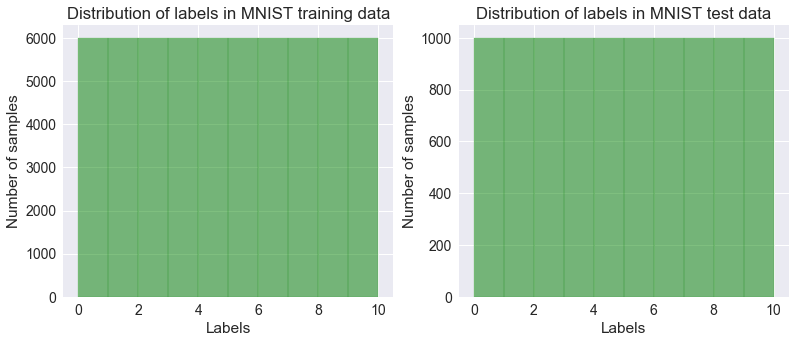

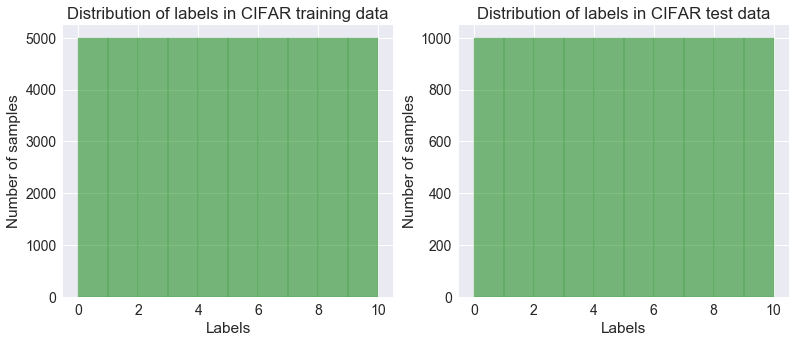

In [130]:
def labelDIST(train_labels, test_labels, name):
    bins = np.arange(0,11)
    fig, ax = plt.subplots(1,2,figsize=(13,5));

    ax[0].set_xlabel('Labels')
    ax[0].set_ylabel('Number of samples')
    ax[0].set_title('Distribution of labels in '+name+ ' training data')
    ax[0].hist(train_labels, bins, edgecolor='green', facecolor='green', alpha=0.5)

    ax[1].set_xlabel('Labels')
    ax[1].set_ylabel('Number of samples')
    ax[1].set_title('Distribution of labels in '+name+ ' test data')
    ax[1].hist(test_labels, bins, edgecolor='green', facecolor='green', alpha=0.5)

    plt.show()

labelDIST(ftrain_df['label'].values, ftest_df['label'].values, 'MNIST')
labelDIST(cftrain_df['labels'].values, cftest_df['labels'].values, 'CIFAR')

## Classification

<div class='alert alert-info'>
**Question 3a:** (code) Implement the Naïve Bayes classifier. [10]
<br><br>
Overview:<br>
Naïve Bayes classifier requires the computation of descriptive statistics of attributes for each class label. In order to facilitate this, the datasets are first organized by class label; i.e. a list of dataframes is created (`data_by_label` for MNIST and `data_by_label_10` for CIFAR10). <br>Each element of the list is a dataframe comprising of records that belong to a specific class label (i.e. `data_by_label[0]` is a dataframe that has training records belonging to class label 0 of MNIST dataset).<br>
The functions defined for the implementation of Naïve Bayes classifier are:<br>
- **`computePrior`:** Here, the prior probability for class labels is set as: Number of samples belonging to that class/Total Number of samples.<br>
- **`descriptive`:** Here the descriptive statistics (mean, standard deviation and variance) are computed for attributes for each class.<br>
- **`predict`:** The probability of a class value given a value of an attribute is called the conditional probability.<br>
By multiplying the conditional probabilities together for each attribute for a given class value, we have a probability of a data instance belonging to that class.<br>
To make a prediction we can calculate probabilities of the instance belonging to each class and select the class value with the highest probability.<br>
<br>
- **`computeAccuracy`:** Evaluates the accuracy of predictions made for a test dataset as the percentage correct out of all predictions made.<br>
</div>

### Separate datasets by label

In [131]:
# Returns a list of dataframes, each list element is a dataframe for a label
def separate_by_label(num_labels, train_df, label_name):
    data_by_label = []
    for i in range(num_labels):
        tmp = train_df[train_df[label_name] == i]
        data_by_label.append(tmp)
    return data_by_label


# Fashion MNIST Data
data_by_label = separate_by_label(len(label_dist_fashion), ftrain_df, 'label')

# CIFAR10 Data
data_by_label_10 = separate_by_label(len(label_dist_cifar), cftrain_df, 'labels')

<div class='alert alert-info'>
<h3> Splitting the 'data' column of CIFAR10 dataset (both train and test data) into 3072 feature columns</h3>
We now further handle the `data` column of the CIFAR10 test and training datasets. This `data` column is a numpy ndarray of shape 50000x3072 for training data and 10000x3072 for test data.<br>
In order to make computations of statistical variables mean, standard deviation and variance simpler for each of the 3072 feature values of each training/test sample, we columnize this array in the dataframe.<br>
The training dataframe is now `featurized_by_label_cf` and the test data frame is `featurized_test_cf`.
</div>

In [132]:
# Training Data CIFAR10
featurized_by_label_cf = []

for c in range(len(label_dist_cifar)):
    data_block = data_by_label_10[c]['data'].values
    #print(data_block)

    data_cols = np.zeros((len(data_block), len(data_block[c])))

    for i in range(len(data_cols)):
        data_cols[i] = data_block[i][:]

    data_names = ['feature'+str(i) for i in range(1, len(data_block[c])+1)] 

    cf_features_df = pd.DataFrame(data=data_cols, columns=data_names)

    cf_features_df.insert(0, 'classlabel', data_by_label_10[c]['labels'].values)
    featurized_by_label_cf.append(cf_features_df)

In [133]:
featurized_by_label_cf[0].head()

,classlabel,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature3063,feature3064,feature3065,feature3066,feature3067,feature3068,feature3069,feature3070,feature3071,feature3072
0,0,202.0,202.0,204.0,206.0,208.0,209.0,210.0,212.0,213.0,...,127.0,149.0,174.0,195.0,212.0,227.0,237.0,243.0,243.0,243.0
1,0,126.0,122.0,126.0,127.0,130.0,130.0,132.0,133.0,130.0,...,117.0,117.0,117.0,116.0,114.0,113.0,111.0,109.0,107.0,102.0
2,0,251.0,247.0,247.0,248.0,249.0,248.0,248.0,248.0,249.0,...,19.0,27.0,27.0,28.0,32.0,30.0,36.0,35.0,33.0,26.0
3,0,255.0,255.0,255.0,182.0,181.0,255.0,255.0,255.0,255.0,...,204.0,243.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
4,0,44.0,47.0,51.0,54.0,53.0,53.0,53.0,54.0,54.0,...,50.0,47.0,47.0,43.0,53.0,48.0,44.0,51.0,52.0,43.0


In [134]:
# Splitting 'data' column of CIFAR10 test dataset into 3072 feature columns 
data_block_test = cftest_df['data'].values
#print(data_block_test)

data_cols_test = np.zeros((len(data_block_test), len(data_block_test[0])))

for i in range(len(data_cols_test)):
    data_cols_test[i] = data_block_test[i][:]

featurized_test_cf = pd.DataFrame(data=data_cols_test, columns=data_names)
featurized_test_cf.head() # Does not include the label column

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature3063,feature3064,feature3065,feature3066,feature3067,feature3068,feature3069,feature3070,feature3071,feature3072
0,158.0,159.0,165.0,166.0,160.0,156.0,162.0,159.0,158.0,159.0,...,130.0,123.0,145.0,167.0,182.0,175.0,145.0,124.0,129.0,110.0
1,235.0,231.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,232.0,...,108.0,117.0,123.0,133.0,141.0,153.0,163.0,178.0,191.0,199.0
2,158.0,158.0,139.0,132.0,166.0,182.0,187.0,193.0,199.0,205.0,...,45.0,46.0,44.0,44.0,43.0,52.0,37.0,8.0,3.0,7.0
3,155.0,167.0,176.0,190.0,177.0,166.0,168.0,166.0,170.0,179.0,...,52.0,55.0,70.0,103.0,105.0,72.0,53.0,50.0,52.0,50.0
4,65.0,70.0,48.0,30.0,23.0,40.0,44.0,45.0,45.0,40.0,...,102.0,127.0,156.0,139.0,131.0,130.0,147.0,136.0,146.0,117.0


In [135]:
# Computes the prior probability of class labels
def computePrior(label_dist):
    return np.array(label_dist) / np.sum(label_dist)

In [136]:
# Computes mean, standard deviation and variance of attributes for each class label
def descriptive(sep_by_label):
    stat_means = []
    stat_stddev = [] 
    stat_var = []

    for i in range(len(sep_by_label)):
        stat_means.append(np.mean(np.array(sep_by_label[i])[:,1:], axis=0))
        stat_stddev.append(np.std(np.array(sep_by_label[i])[:,1:], axis=0))
        stat_var.append(np.var(np.array(sep_by_label[i])[:,1:], axis=0)+1e-2)
        
    return (np.array(stat_means), np.array(stat_stddev), np.array(stat_var))
    

In [137]:
# Compute predictions and likelihood
from scipy.stats import multivariate_normal as mvn
def predict(X_test, means, variances, priors):
    N, D = X_test.shape
    K = len(means)
    P = np.zeros((N, K))
    for c in range(len(means)):
        mean, var = means[c], variances[c]
        P[:,c] = mvn.logpdf(X_test, mean=mean, cov=var) + np.log(priors[c])
    return np.argmax(P, axis=1), np.max(P, axis=0)

In [138]:
def computeAccuracy(pred, y):
    accuracy = np.sum(pred == y) / len(y)
    return accuracy

<div class='alert alert-info'>
**Question 3b:** (text) Describe a positive and a negative feature of the classifier for these tasks [5]<br><br>

**Answer:**<br>
Positive features:<br>
The major advantage of Naive Bayes classifier lies in its simplicity, ability to work with large dimensional data and also that it is computationally fast. Especially when the assumption of independence holds true, Naive Bayes approach performs better compared to other models; also with lesser training data.<br>
Naive Bayes performs well in case of categorical input variables compared to numerical variables. For numerical variables, normal distribution is assumed (bell curve, which is a strong assumption).<br><br> 
Negative features:<br>
Since Naive Bayes is built on the assumption of independence between feature variables, the performance would be adversely affected, if independence is not the case for a given dataset which instead comprises correlated attributes.<br>
Also, the computation of conditional probabilities requires that the training data be complete such that the situation of probability becoming zero is prevented. To overcome this, implementations generally use a form of a correction that assigns arbitrarily low probabilities.<br>
When an attribute is continuous, computing the probabilities by the traditional method of frequency counts is not possible. In this case we would either need to convert the attribute to a discrete variable or use probability density functions to compute probability densities (not actual probabilities!). 
<br>
</div>

<div class='alert alert-info'>
**Question 3c:** (text) Describe any data pre-processing that you suggest for this data and your classifier [5]<br><br>

**Answer:**<br>
As observed previously, the datasets (both Fashion MNIST and CIFAR10) contain class labels that are uniformly distributed across the samples. Therefore, all class labels have equal initial/prior probabilities.<br> In other words, the dataset is balanced and class labels are equally distributed.<br>If this was not the case, it would be required to trim the datasets such that class labels would be uniformly assigned; possibly by choosing to randomly filter out records from class labels with higher population.<br><br>

Also, in the case of using other models/ classifiers for these datasets, it would be advantageous to carry out dimensionality reduction to handle data and train more efficiently. However since Naive Bayes has the ability to efficiently handle large dimensional data, and also since it is not very sensitive to irrelevant features, applying dimensionality reduction here would not help much.



</div>

<div class='alert alert-info'>
**Question 3d:** (code) Apply your classifier to the two given datasets. Make sure your optimization
is clearly commented. Use classification accuracy and test log-likelihood as your
figures of merit [15]<br><br>

</div>

#### Setting prior probability for class labels for MNIST and CIFAR 

In [139]:
# Computing Prior Probability for class labels :: MNIST
priorClass_fashion = computePrior(label_dist_fashion)
print(priorClass_fashion)

# Computing Prior Probability for class labels :: CIFAR
priorClass_cifar = computePrior(label_dist_cifar)
print(priorClass_cifar)

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


#### Training :: Compute Mean, Standard Deviation and Variances of features for each class

In [140]:
# FIND MEAN, VARIANCE, STANDARD DEVIATION FASHION MNIST
(means_mnist, stddev_mnist, var_mnist) = descriptive(data_by_label)

# FIND MEAN, VARIANCE, STANDARD DEVIATION CIFAR10
(means_cifar, stddev_cifar, var_cifar) = descriptive(featurized_by_label_cf)

In [141]:
print(np.shape(means_mnist))
print(np.shape(stddev_mnist))
print(np.shape(var_mnist))

print(np.shape(means_cifar))
print(np.shape(stddev_cifar))
print(np.shape(var_cifar))

(10, 784)
(10, 784)
(10, 784)
(10, 3072)
(10, 3072)
(10, 3072)


#### Predicting :: Compute predictions for MNIST test data and CIFAR test data

In [142]:
# Computing prediction for each test input :: MNIST

testdata_mnist = np.array(ftest_df)[:, 1:]
Predicted_Labels, likelihood_mnist = predict(testdata_mnist, means_mnist, var_mnist, priorClass_fashion)
print(np.shape(Predicted_Labels))

(10000,)


In [143]:
# Computing prediction for each test input :: CIFAR
testdata_cifar = np.array(featurized_test_cf)
Predicted_Labels_cifar, likelihood_cifar = predict(testdata_cifar, means_cifar, var_cifar, priorClass_cifar)
print(np.shape(Predicted_Labels_cifar))

(10000,)


#### Computing Naive Bayes classification accuracies for MNIST and CIFAR  

In [145]:
accuracy_mnist = computeAccuracy(Predicted_Labels, ftest_df['label'].values)
accuracy_cifar = computeAccuracy(Predicted_Labels_cifar, cftest_df['labels'].values)
print('Naive Bayes classifiaction accuracy for MNIST test = ', accuracy_mnist)
print('Naive Bayes classifiaction accuracy for CIFAR test = ', accuracy_cifar)

Naive Bayes classifiaction accuracy for MNIST test =  0.6124
Naive Bayes classifiaction accuracy for CIFAR test =  0.2976


<div class='alert alert-info'>
**Question 3e:** (code) Display the confusion matrix on the test data [5]
</div>

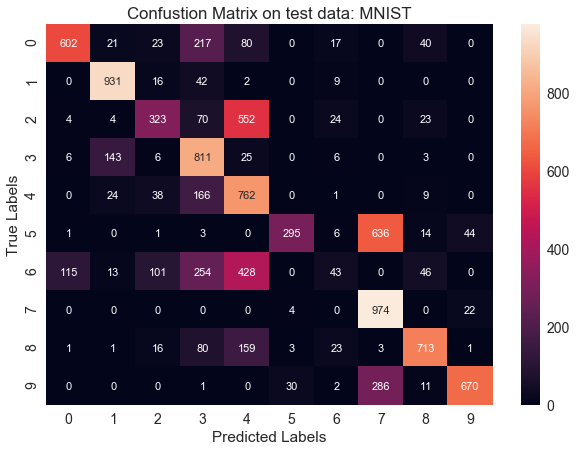

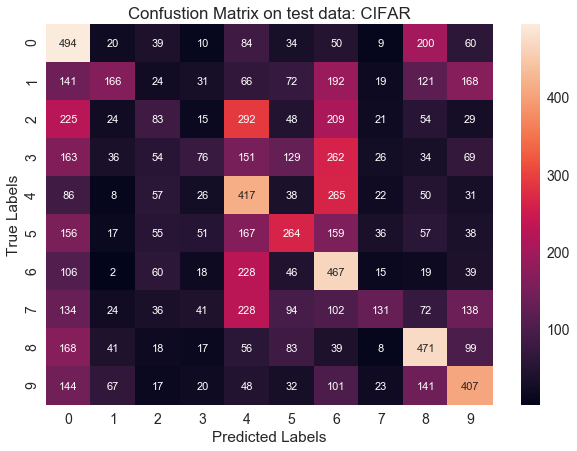

In [146]:
def displayConfusionMat(real_y, pred_y, title):
    confMat = confusion_matrix(real_y, pred_y)
    
    confMat_df = pd.DataFrame(confMat, range(10), range(10))
    plt.figure(figsize = (10,7))
    plt.title('Confustion Matrix on test data: '+title)
    sn.set(font_scale=1.4)
    ax = sn.heatmap(confMat_df, annot=True,annot_kws={"size": 11}, fmt='d')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    

displayConfusionMat(ftest_df['label'].values, Predicted_Labels, 'MNIST')
displayConfusionMat(cftest_df['labels'].values, Predicted_Labels_cifar, 'CIFAR')

<div class='alert alert-info'>
**Question 3f:** (text) Discuss the performance, compare them against a classifier that outputs
random class labels, and suggest ways in which performance could be improved [5]<br><br>

**Answer:**<br>
As computed above, the accuracy of Naive Bayes classifier for MNIST dataset is 61.24% and for CIFAR10 dataset is 29.76%. It has to be noted that these accuracies are considerably low compared to classification accuracies of current modern learning algorithms.<br> 
While on the other hand, it could be expected that a random classifier which renders random class labels for classification would result in an accuracy that is even worse.<br>
This is because, with Naive Bayes, the probability of class labels depends on the distribution of the features in the datasets; this acts as a guide in deciding the classification (therefore not random as in the case of a random classifier).<br>This considerably low performance could be attributed to the strong assumptions (of independence and normal distribution for numerical features) underlying the structure of Naive Bayes.
<br><br>
We observe a marked difference in the accuracies of Naive Bayes for MNIST and CIFAR datasets. This could be due to the fact that the CIFAR dataset is clearly more complex in terms of content (MNIST- grayscale data, CIFAR- RGB data) and in terms of the number of dimensions. 
</div>

## Bayesian Linear Regression

<div class='alert alert-info'>
**Question 4a:** (code) Implement Bayesian linear regression (you should already have an
implementation from the lab sessions) [10]<br><br>

Here, the response variable: which is the class label for Fashion MNIST and CIFAR10, is a function of the respective attribute/ feature sets (784 for MNIST and 3072 for CIFAR10).<br>
This can be represented in general as:<center>$y\_pred = w_0 + w_1x + w_2x^2 + ... + w_Kx^K = \Sigma_{k=0}^K w_kx^k$</center>
<br><br>
We use Bayes rule to find the probability distribution of weights, given the training dataset of features and labels $(X,t)$:<br>
$p(w|X,t) = \frac{p(t|X,w) p(w)}{p(t|X)}$ which is<br> $posterior(w) = \frac{likelihood * prior(w)}{marginal\_likelihood}$

<br>We then use the maximum mean of the computed distributions as our prediction. The functions defined to implement Bayesian Linear Regression are:<br>
**`organizeFeatureMat_MNIST`:** Adds noise and includes a bias column to the feature matrix of MNIST. (CIFAR features have been organized separately as they required flattening.<br>
**`encode_labels`:** Vectorizes labels which are categorical and makes them suitable to be used for regression.<br>
**`MaxLikelihoodEstimate`:** Computes likelihood estimates for weights and noise variance.<br>
**`meanSqErr`:** Computes mean squared error for regression prediction with respect to the true values.<br>
**`computePosterior`:** Computes the posterior probability density of the regression weights and returns the posterior mean and covariance.  


</div>

In [147]:
# Adds noise and includes a bias column to the feature matrix
def organizeFeatureMat_MNIST(features, noise=0):
    # Adding Noise
    features += np.random.randn(len(features), len(features[0])) * noise
    # Including column of ones as bias
    bias = np.array([np.ones(len(features))]).T 
    features = np.hstack((bias, features))
    
    return features

    

In [148]:
# Vectorize labels (which are categorical) to be used for regression
def encode_labels(labels):
    encoder = OneHotEncoder()
    labels_reshaped = np.array(labels).reshape(-1, 1)
    encoded_labels = encoder.fit_transform(labels_reshaped).toarray()

    return encoded_labels

In [149]:
# Computing likelihood estimates for weights and noise variance.
def MaxLikelihoodEstimate(feature_mat, labels):
    # estimate for regression weights
    W_hat = np.linalg.inv(np.dot(feature_mat.T, feature_mat)).dot(feature_mat.T).dot(labels)
    #estimate for noise variance
    var_hat = 1/len(feature_mat) * np.linalg.norm(labels - np.dot(feature_mat, W_hat), axis=0)**2
    
    return W_hat, var_hat

In [150]:
def meanSqErr(true_y, pred_y): 
    return 1 / len(true_y) * np.linalg.norm(true_y - pred_y)**2

In [151]:
# Computes the posterior distribution of weights: returns mean and variance
def computePosterior(features, labels, noise_var):
    label_cols = labels.shape[1]
    feature_cols = features.shape[1]
    XTdotX = np.dot(features.T, features)
    
    # Setting PRIOR probability density for W with mean mean_0 and variance S
    mean_0 = np.zeros((feature_cols, label_cols))
    S = np.eye(feature_cols)
    S = np.repeat(S[:, :, np.newaxis], label_cols, axis=2)
    
    # Computing the POSTERIOR for W:
    # Set similar shapes for mean and variance
    Sigma = np.ndarray(S.shape)
    Mu = np.ndarray(mean_0.shape)
    
    # Computing posterior variance :: Sigma = [1/noise_var X.TX + S.inv].inv 
    # 1/noise_var is beta
    for i in range(label_cols):
        Sigma[:,:,i] = np.linalg.inv(1/noise_var[i] * XTdotX + np.linalg.inv(S[:,:,i]))
    
    # Computing posterior mean :: Mu = (1/noise_var X.T*t) Sigma
    for i in range(label_cols):
        Mu[:, i] = Sigma[:,:,i] \
            .dot(1/noise_var[i] * features.T.dot(labels[:, i]) \
            + np.linalg.inv(S[:,:,i]).dot(mean_0[:, i]))
            
    return Mu, Sigma

<div class='alert alert-info'>
**Question 4b:** (code) Treat class labels as continuous and apply regression to the training data. [15]
</div>

#### Organizing feature matrix of MNIST test and train

In [154]:
# Organize MNIST
ftrain_mat_X = np.array(ftrain_df)[:,1:]
ftest_mat_X = np.array(ftest_df)[:,1:]
print('Feature matrix before organizing train and test MNIST:\n', np.shape(ftrain_mat_X), np.shape(ftest_mat_X))

ftrain_mat_X_p = organizeFeatureMat_MNIST(ftrain_mat_X.astype(float), noise=0.01)
ftest_mat_X_p = organizeFeatureMat_MNIST(ftest_mat_X.astype(float)) 
print('Feature matrix after organizing train and test MNIST:\n', np.shape(ftrain_mat_X_p), np.shape(ftest_mat_X_p))

Feature matrix before organizing train and test MNIST:
 (60000, 784) (10000, 784)
Feature matrix after organizing train and test MNIST:
 (60000, 785) (10000, 785)


#### Encoding MNIST class labels for train and test 

In [157]:
ftrain_pred_t = encode_labels(ftrain_df['label'].values)
ftest_pred_t = encode_labels(ftest_df['label'].values)
print('Shape of encoded labels train and test MNIST:\n', np.shape(ftrain_pred_t), np.shape(ftest_pred_t))

Shape of encoded labels train and test MNIST:
 (60000, 10) (10000, 10)


#### Organizing CIFAR train and test data after flattening 

In [156]:
# Organize CIFAR features
features_cifar = cftrain_df['data'].values
noise = 0.01
features_cifar = np.array([f.flatten() for f in features_cifar], dtype='float')
# Adding Noise
features_cifar += np.random.randn(len(features_cifar), len(features_cifar[0])) * noise
# Including column of ones as bias
bias_cifar = np.array([np.ones(len(features_cifar))]).T 
features_cifar = np.hstack((bias_cifar, features_cifar))
print('Feature matrix of CIFAR train after organizing: ', np.shape(features_cifar))

#Test CIFAR
features_cifar_test = cftest_df['data'].values
noise = 0
features_cifar_test = np.array([f.flatten() for f in features_cifar_test], dtype='float')
# Adding Noise
features_cifar_test += np.random.randn(len(features_cifar_test), len(features_cifar_test[0])) * noise
# Including column of ones as bias
bias_cifar_test = np.array([np.ones(len(features_cifar_test))]).T 
features_cifar_test = np.hstack((bias_cifar_test, features_cifar_test))
print('Feature matrix of CIFAR test after organizing: ', np.shape(features_cifar_test))


Feature matrix of CIFAR train after organizing:  (50000, 3073)
Feature matrix of CIFAR test after organizing:  (10000, 3073)


#### Encoding CIFAR class labels for train and test data

In [158]:
cftrain_pred_t = encode_labels(cftrain_df['labels'].values)
cftest_pred_t = encode_labels(cftest_df['labels'].values)
print('Shape of encoded CIFAR labels train and test: ', np.shape(cftrain_pred_t), np.shape(cftest_pred_t))

Shape of encoded CIFAR labels train and test:  (50000, 10) (10000, 10)


#### Computing maximum likelihood estimates 

In [159]:
# MNIST
WHat_MNIST, VarHat_MNIST = MaxLikelihoodEstimate(ftrain_mat_X_p, ftrain_pred_t)
p_mnist = np.argmax(np.dot(ftest_mat_X_p, WHat_MNIST),axis=1)
#CIFAR
WHat_CIFAR, VarHat_CIFAR = MaxLikelihoodEstimate(features_cifar, cftrain_pred_t)
p_cifar = np.argmax(np.dot(features_cifar_test, WHat_CIFAR),axis=1)

print('MLE based MNIST test accuracy= ', computeAccuracy(p_mnist, ftest_df['label'].values))
print('MLE based CIFAR test accuracy= ',computeAccuracy(p_cifar, cftest_df['labels'].values))

MLE based MNIST test accuracy=  0.8217
MLE based CIFAR test accuracy=  0.364


#### Computing Posterior probability distribution for MNIST and CIFAR

In [160]:
Mu_MNIST, Sigma_MNIST = computePosterior(ftrain_mat_X_p, ftrain_pred_t, VarHat_MNIST)
pred_MNIST = np.argmax(np.dot(ftest_mat_X_p, Mu_MNIST), axis=1)

Mu_CIFAR, Sigma_CIFAR = computePosterior(features_cifar, cftrain_pred_t, VarHat_CIFAR)
pred_CIFAR = np.argmax(np.dot(features_cifar_test, Mu_CIFAR), axis=1)

<div class='alert alert-info'>
**Question 4c:** (code) Produce a scatter plot showing the predictions versus the true targets for the test set and compute the mean squared error on the test set [5]
</div>

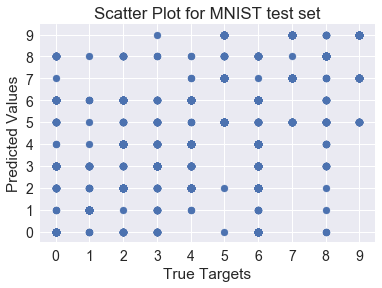

In [161]:
plt.scatter(ftest_df['label'].values, pred_MNIST)
plt.xlabel('True Targets')
plt.ylabel('Predicted Values')
plt.xticks((np.arange(0,10)))
plt.yticks((np.arange(0,10)))
plt.title('Scatter Plot for MNIST test set')
plt.show()

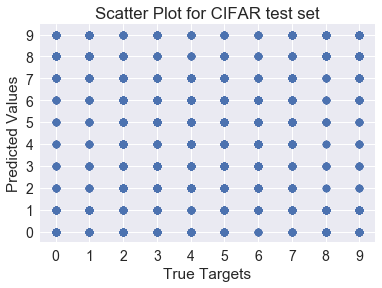

In [162]:
plt.scatter(cftest_df['labels'].values, pred_CIFAR)
plt.xlabel('True Targets')
plt.ylabel('Predicted Values')
plt.xticks((np.arange(0,10)))
plt.yticks((np.arange(0,10)))
plt.title('Scatter Plot for CIFAR test set')
plt.show()

#### Computing Mean Squared Error for test data 

In [163]:
MSE_MNIST = meanSqErr(ftest_df['label'].values, pred_MNIST)
print("Mean Squared Error for MNIST test set: ", MSE_MNIST)

MSE_CIFAR = meanSqErr(cftest_df['labels'].values, pred_CIFAR)
print('Mean Squared Error for CIFAR test set: ', MSE_CIFAR)

Mean Squared Error for MNIST test set:  2.1853999999999996
Mean Squared Error for CIFAR test set:  12.755799999999999


<div class='alert alert-info'>
**Question 4d:** (text) Suggest a way to descretize predictions and display the confusion matrix on the test data and report accuracy [5]<br><br>

**Answer:**<br>
Descretizing predictions: In the above implementation of Bayesian linear regression, we use One Hot Encoding to transform categorical/ discrete variables (here, labels) to a form on which regression can be done gracefully. Retrieving predictions will then involve considering the index of maximum value in the list of the predictions to obtain the corresponding predicted label.
<br>However, the approaches of discretization that could be used in the case where the labels were considered to be continuous inlude: *density estimation* (creating probability mass functions), *binning* (include continuous variables in  a specific range in a corresponding bin). 
</div>

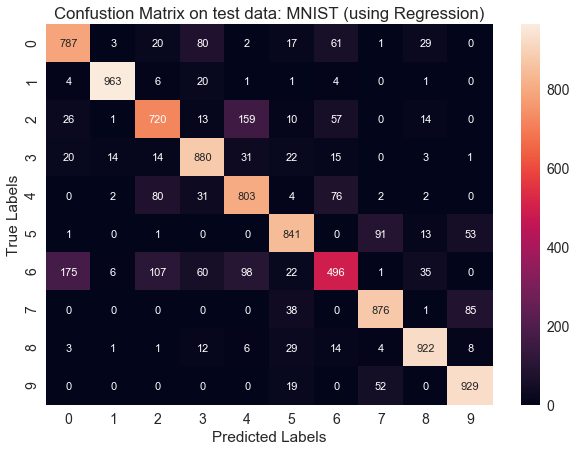

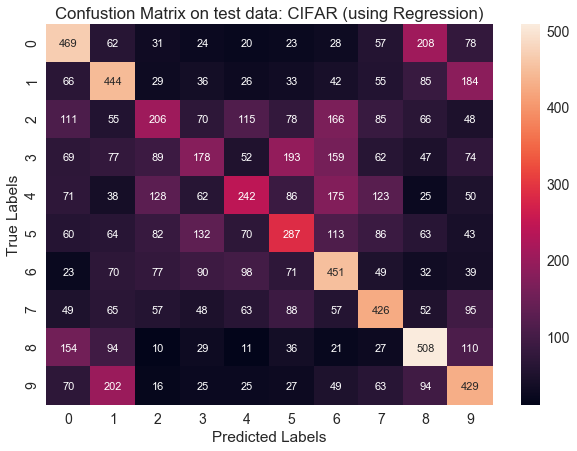

In [166]:
# Displaying confustion matrix

displayConfusionMat(ftest_df['label'].values, pred_MNIST, 'MNIST (using Regression)')
displayConfusionMat(cftest_df['labels'].values, pred_CIFAR, 'CIFAR (using Regression)')

#### Reporting Accuracy

In [167]:
accuracy_reg_MNIST = computeAccuracy(pred_MNIST, ftest_df['label'].values)
accuracy_reg_CIFAR = computeAccuracy(pred_CIFAR, cftest_df['labels'].values)

print('Regression accuracy for MNIST = ', accuracy_reg_MNIST)
print('Regression accuracy for CIFAR = ', accuracy_reg_CIFAR)


Regression accuracy for MNIST =  0.8217
Regression accuracy for CIFAR =  0.364


<div class='alert alert-info'>
**Question 4e:** (text) Discuss regression performance with respect to classification performance [5]<br><br>

**Answer:**<br>
Regression models are designed to predict continuous variables (however, discrete categorical variables can be encoded and regressed using categorical encoders). <br>Regression methods are also suitable for predicting probabilities and such methods can be applied to be a part of a classification problem such as the case of CIFAR and MNIST here(decide the category of images), where we compute the probability of the label for a sample image and finally choose the label that has the highest probability.<br>Intuitively, since probabilities are continuous, we are indeed successful (and better than Naive Bayes Classifier) at using regression to decide on the most probabilistic class label for the given samples.<br>

So we can see that applying Bayesian linear regression to classify images resulted in a better performance than using Naive Bayes classifier. 
</div>

<div class='alert alert-info'>
**Question 4f:** (text) Describe one limitation of using regression for this paticular task. [5]<br><br>

**Answer:**<br>
One limitation of using Bayesian linear regression is that the structure of the regression model is fixed:<br>
<center>$y\_pred = w_0 + w_1x + w_2x^2 + ... + w_Kx^K = \Sigma_{k=0}^K w_kx^k$</center><br>
And this above structure is independent of the structure of the data (images). Therefore, any changes such as resizing of images or shuffling of pixels will result in reorganized weights thereby adversely affecting prediction. Also, this fixed model structure hinders the model from learning more complex functions to fit the given data (images).   
</div>